In [1]:
from qaoa import *
import matplotlib.pyplot as plt


In [2]:
def plot_cost_functions(arrays, names, colors=plt.cm.tab10.colors, title=None, transitions=None):
    """
    Plot cost functions with optional transitions between different optimization methods.

    Args:
    - arrays (list of arrays): List of arrays containing cost function values.
    - names (list of str or list of lists of str): Names of optimization methods or list of lists for multiple methods.
    - colors (list of colors): Colors for plotting.
    - title (str): Title of the plot.
    - transitions (list of lists of int, optional): Indices where transitions between methods occur.

    Returns:
    - None: The function displays the plot.

    """
    num_arrays = len(arrays)

    plt.figure(figsize=(10, 10))
    if transitions is None:
        transitions = [None] * num_arrays

    color_counter = 0

    for i in range(num_arrays):
        values = arrays[i]
        label = names[i]
        
        if transitions[i] is None:
            # If there are no transitions, plot the entire array with a single color
            color = colors[color_counter%len(colors)]
            color_counter += 1
            
            plt.plot(np.arange(len(values)), values, label=label, alpha=0.5, color=color, linewidth=0.5)

            # Plot step functions representing the minimum found so far for each method
            buf = 0
            min_val = values[0]
            for j in range(1, len(values)):
                if values[j] < min_val:
                    plt.plot([buf, j + 1], [min_val, min_val], color=color, linestyle='-', linewidth=4, alpha=1)
                    min_val = values[j]
                    buf = j
                if j == len(values)-1:
                    plt.plot([buf, j + 1], [min_val, min_val], color=color, linestyle='-', linewidth=4, alpha=1)
        else:
            # If there are transitions, plot segments with different colors
            color = colors[color_counter%10]
            color_counter += 1
            
            plt.plot(np.arange(transitions[i]), values[:transitions[i]], label=label[0], alpha=0.5, color=color, linewidth=0.5)

            # Plot step functions representing the minimum found so far for each method
            buf = 0
            min_val = values[0]
            for j in range(1, transitions[i]):
                if values[j] < min_val:
                    plt.plot([buf, j + 1], [min_val, min_val], color=color, linestyle='-', linewidth=4, alpha=1)
                    min_val = values[j]
                    buf = j
                if j == transitions[i]-1:
                    plt.plot([buf, j + 1], [min_val, min_val], color=color, linestyle='-', linewidth=4, alpha=1)
                    buf = j

            color = colors[color_counter%len(colors)]
            color_counter += 1
            
            plt.plot(np.arange(transitions[i],len(values)), values[transitions[i]:], label=label[1], alpha=0.5, color=color, linewidth=0.5)

            # Plot step functions representing the minimum found so far for each method
            for j in range(transitions[i], len(values)):
                if values[j] < min_val:
                    plt.plot([buf, j + 1], [min_val, min_val], color=color, linestyle='-', linewidth=4, alpha=1)
                    min_val = values[j]
                    buf = j
                if j == len(values)-1:
                    plt.plot([buf, j + 1], [min_val, min_val], color=color, linestyle='-', linewidth=4, alpha=1)

        # Annotate the global minimum on the right side of the plot
        plt.annotate(f'{min_val:.2f}', xy=(len(values) - 1, min_val), xytext=(len(values) + 20, min_val),
                     color=color, fontsize=12, ha='left', va='center')

    # Add grid lines
    plt.grid(True)

    # Adjust y-axis label to be on the right side
    plt.ylabel('Cost Function')

    plt.xlabel('Number of Evaluations')
    if title is None:
        plt.title('Cost Function vs. Number of Evaluations')
    else:
        plt.title(title)

    # Set legend with thicker lines
    legend = plt.legend()
    for line, color in zip(legend.get_lines(), colors):
        line.set_linewidth(3)  # Set thicker lines for the legend
        line.set_alpha(1)
        line.set_color(color)
    plt.show()


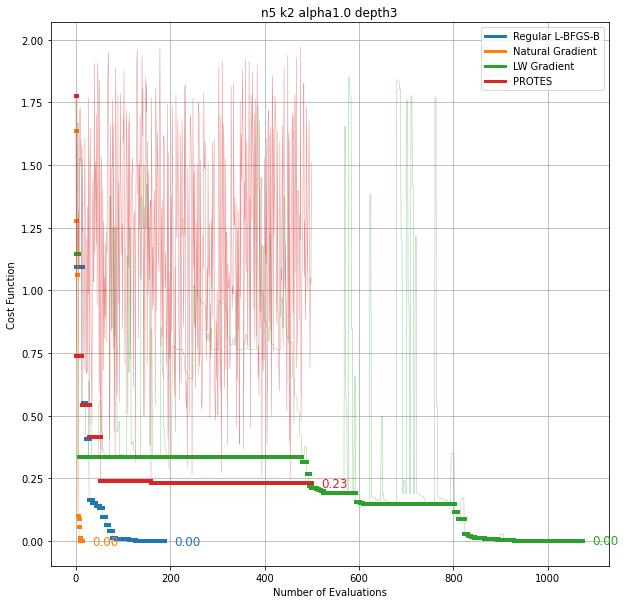

In [3]:
np.random.seed(25)
n = 5
k = 2
alpha = 1.0
depth = 3

k_sat_hamiltonian = H_sat(n, k, alpha)
qaoa = QAOA(depth=depth, H=k_sat_hamiltonian)
qaoa.track_cost = True

# Run optimization using the regular L-BFGS-B method
qaoa.run()
cost_values_reg = np.copy(qaoa.tracked_cost)
qaoa.reset()

# Run optimization using the natural gradient strategy
qaoa.run_QFI()
cost_values_natgrad = np.copy(qaoa.tracked_cost)
qaoa.reset()

# Run optimization using the layer-wise learning
qaoa.run_heuristic_LW(heruistic_LW_seed1=10, heruistic_LW_seed2=10)
cost_values_lw = np.copy(qaoa.tracked_cost)
qaoa.reset()

# Run optimization using the PROTES method
qaoa.run_PROTES(m=500)
cost_values_protes = np.copy(qaoa.tracked_cost)
qaoa.reset()

# Plot cost functions for comparison
plot_cost_functions([cost_values_reg, cost_values_natgrad, cost_values_lw, cost_values_protes],
                    ['Regular L-BFGS-B', 'Natural Gradient', 'LW Gradient', 'PROTES'], title=f'n{n} k{k} alpha{alpha} depth{depth}')


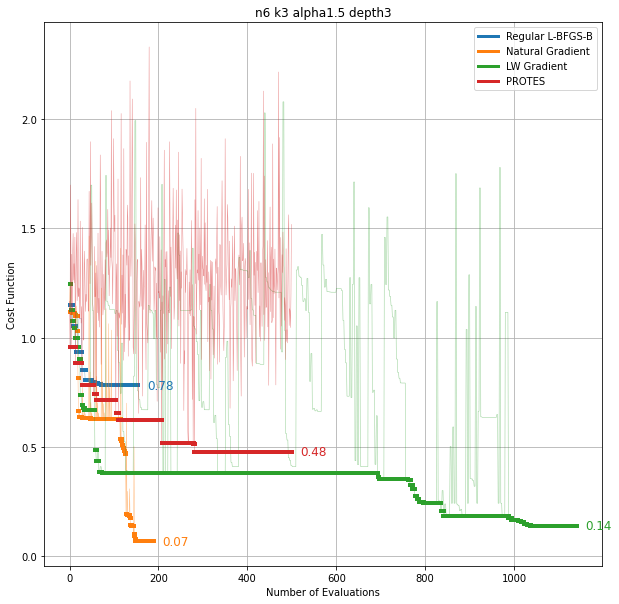

In [4]:
np.random.seed(25)
n = 6
k = 3
alpha = 1.5
depth = 3

k_sat_hamiltonian = H_sat(n, k, alpha)
qaoa = QAOA(depth=depth, H=k_sat_hamiltonian)
qaoa.track_cost = True

# Run optimization using the regular L-BFGS-B method
qaoa.run()
cost_values_reg = np.copy(qaoa.tracked_cost)
qaoa.reset()

# Run optimization using the natural gradient strategy
qaoa.run_QFI()
cost_values_natgrad = np.copy(qaoa.tracked_cost)
qaoa.reset()

# Run optimization using the layer-wise learning
qaoa.run_heuristic_LW(heruistic_LW_seed1=10, heruistic_LW_seed2=10)
cost_values_lw = np.copy(qaoa.tracked_cost)
qaoa.reset()

# Run optimization using the PROTES method
qaoa.run_PROTES(m=500)
cost_values_protes = np.copy(qaoa.tracked_cost)
qaoa.reset()

# Plot cost functions for comparison
plot_cost_functions([cost_values_reg, cost_values_natgrad, cost_values_lw, cost_values_protes],
                    ['Regular L-BFGS-B', 'Natural Gradient', 'LW Gradient', 'PROTES'], title=f'n{n} k{k} alpha{alpha} depth{depth}')


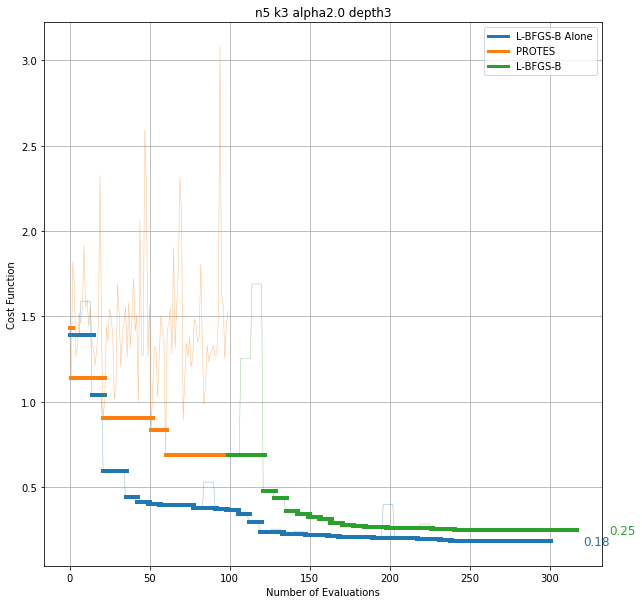

In [5]:
# Example usage:
np.random.seed(25)
n = 5
k = 3
alpha = 2.0
depth = 3

k_sat_hamiltonian = H_sat(n, k, alpha)
qaoa = QAOA(depth=depth, H=k_sat_hamiltonian)
qaoa.track_cost = True

# Run L-BFGS-B optimization alone
qaoa.run()
cost_values_lbfgsb_alone = np.copy(qaoa.tracked_cost)

# Reset QAOA instance
qaoa.reset()

# Run optimization using PROTES first, then L-BFGS-B
qaoa.run_PROTES(m=100)
cost_values_protes = np.copy(qaoa.tracked_cost)
transition_protes = len(cost_values_protes)

qaoa.run()
cost_values_lbfgsb_after_protes =  np.copy(qaoa.tracked_cost)

# Plot cost functions for comparison
plot_cost_functions([cost_values_lbfgsb_alone, cost_values_lbfgsb_after_protes],
                    ['L-BFGS-B Alone', ['PROTES', 'L-BFGS-B']],
                    title=f'n{n} k{k} alpha{alpha} depth{depth}', transitions=[None,transition_protes])


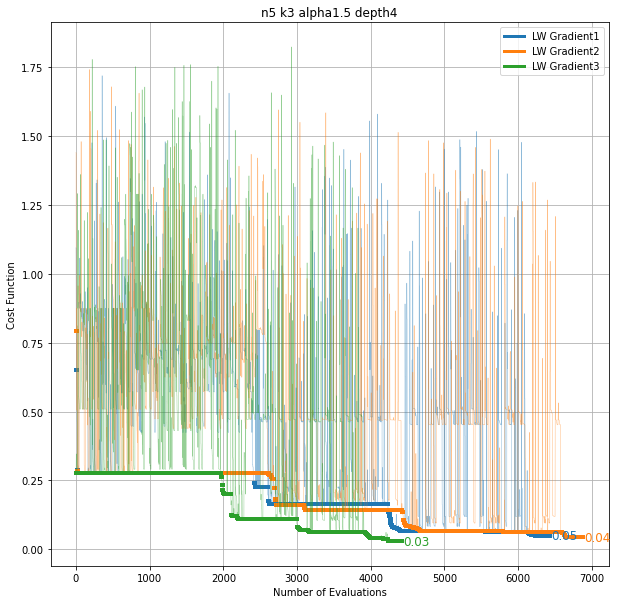

In [6]:
np.random.seed(25)

# Define the number of variables (n), clauses (k), and alpha for k-SAT Hamiltonian
n = 5
k = 3
alpha = 1.5

# Create a k-SAT Hamiltonian
k_sat_hamiltonian = H_sat(n, k, alpha)
depth = 4

# Initialize QAOA with a specific depth and the k-SAT Hamiltonian
qaoa = QAOA(depth=depth, H=k_sat_hamiltonian)
qaoa.track_cost = True

# Run optimization using the layer-wise learning
qaoa.run_heuristic_LW()
cost_values_lw1 = np.copy(qaoa.tracked_cost)
qaoa.reset()

# Run optimization using the layer-wise learning with different seed 1
qaoa.run_heuristic_LW(heruistic_LW_seed1=30)
cost_values_lw2 = np.copy(qaoa.tracked_cost)
qaoa.reset()

# Run optimization using the layer-wise learning with different seed 2
qaoa.run_heuristic_LW(heruistic_LW_seed2=30)
cost_values_lw3 = np.copy(qaoa.tracked_cost)
qaoa.reset()

# Plot cost functions for comparison
plot_cost_functions([cost_values_lw1, cost_values_lw2, cost_values_lw3],
                    ['LW Gradient1', 'LW Gradient2', 'LW Gradient3'], title=f'n{n} k{k} alpha{alpha} depth{depth}')
